In [28]:
# Data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/home/yash-jadhav/Jadhav/DataForge/archive/train.csv')

# Display the first 5 rows
print(df.head())

                                              tweets       class
0  Be aware  dirty step to get money  #staylight ...  figurative
1  #sarcasm for #people who don't understand #diy...  figurative
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative
3  @wilw Why do I get the feeling you like games?...  figurative
4  -@TeacherArthurG @rweingarten You probably jus...  figurative


In [30]:
df['class'].unique()

array(['figurative', 'irony', 'regular', 'sarcasm'], dtype=object)

In [31]:
df.shape

(81408, 2)

In [32]:
num_nan = df['class'].isna().sum()
print(f"Number of rows with NaN label: {num_nan}")

Number of rows with NaN label: 0


In [33]:
# Replace class name as either 'Sarcasm' or 'Genuine'
def map_label(label):
    if label in ['sarcasm', 'irony']:
        return 'Sarcastic'
    elif label in ['regular', 'figurative']:
        return 'Genuine'
    else:
        return np.nan

df['label_binary'] = df['class'].apply(map_label)
df = df.dropna(subset=['label_binary'])  # Remove rows with no label

In [34]:
df.head()

,tweets,class,label_binary
0,Be aware dirty step to get money #staylight ...,figurative,Genuine
1,#sarcasm for #people who don't understand #diy...,figurative,Genuine
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,Genuine
3,@wilw Why do I get the feeling you like games?...,figurative,Genuine
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,Genuine


In [35]:
df.shape

(81408, 3)

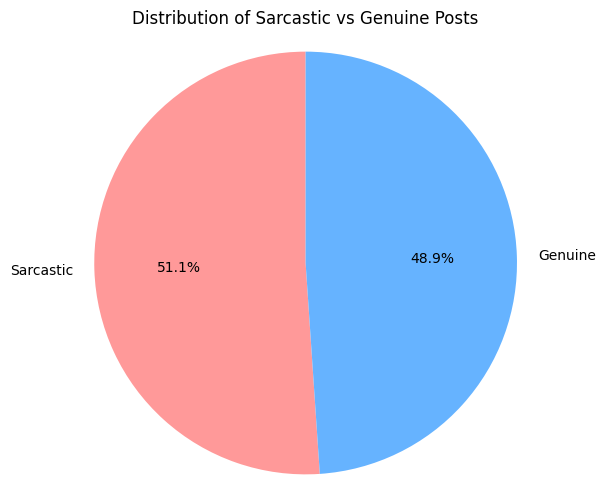

In [36]:
import matplotlib.pyplot as plt

# Count the label distribution
label_counts = df['label_binary'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FF9999','#66B3FF'])
plt.title("Distribution of Sarcastic vs Genuine Posts")
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()


In [37]:
df[df['label_binary'] == 'Sarcastic'].head()

,tweets,class,label_binary
21238,"Fav moment in Sepp Blatter vid (0:20): ""We hav...",irony,Sarcastic
21239,Just found this while walking my human.... #ir...,irony,Sarcastic
21240,'Disrespected the wife of Prophet' - pseudo li...,irony,Sarcastic
21241,Do you know that super yeay satisfying feeling...,irony,Sarcastic
21242,If you're going to call someone ignorant and s...,irony,Sarcastic


In [42]:
df.loc[21238, 'tweets']

'Fav moment in Sepp Blatter vid (0:20): "We have to clean here first. This has nothing to do with football." https://t.co/4dhWOK9x2e #irony'

In [44]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 12.0 MB/s eta 0:00:00


In [49]:
nltk.download('tokenizers/punkt')

[nltk_data] Error loading tokenizers/punkt: Package 'tokenizers/punkt'
[nltk_data]     not found in index


False

In [47]:
#Preprocessing
import re
import emoji
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure NLTK resources are downloaded (run once)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the Lemmatizer and Stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocess tweet function
def preprocess_tweet(tweet):
    # 1. Convert to lowercase
    tweet = tweet.lower()
    
    # 2. Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet)
    
    # 3. Remove mentions (@user)
    tweet = re.sub(r"@[\w]+", "", tweet)
    
    # 4. Remove HTML tags
    tweet = re.sub(r"<.*?>", "", tweet)  # This removes HTML tags like <div>, <span>, etc.
    
    # 5. Remove special characters and punctuation (keep emojis)
    tweet = re.sub(r"[^\w\s,']", "", tweet)
    
    # 6. Convert emojis to text (optional)
    tweet = emoji.demojize(tweet)
    
    # 7. Tokenization
    words = word_tokenize(tweet)
    
    # 8. Remove stopwords
    words = [word for word in words if word not in stop_words]
    
    # 9. Lemmatization (optional)
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words back into a single string
    return " ".join(words)

# Apply preprocessing to the 'tweets' column
df['processed_tweets'] = df['tweets'].apply(preprocess_tweet)

# Preview the cleaned data
print(df[['tweets', 'processed_tweets']].head())


[nltk_data] Downloading package punkt to /home/yash-
[nltk_data]     jadhav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/yash-
[nltk_data]     jadhav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/yash-
[nltk_data]     jadhav/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/home/yash-jadhav/nltk_data'
    - '/home/yash-jadhav/my-jupyter-env/nltk_data'
    - '/home/yash-jadhav/my-jupyter-env/share/nltk_data'
    - '/home/yash-jadhav/my-jupyter-env/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************
